# Expected Value Theory

In [1]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

The expected value theory experiment has to be initialized with a specific formula and effects.

In [2]:
import numpy as np
from autora.experiment_runner.synthetic.economics.expected_value_theory import expected_value_theory

s = expected_value_theory()

Check the docstring to get information about the model

In [3]:
help(expected_value_theory)

Help on function expected_value_theory in module autora.experiment_runner.synthetic.economics.expected_value_theory:

expected_value_theory(name='Expected Value Theory', choice_temperature: float = 0.1, value_lambda: float = 0.5, resolution=10, minimum_value=-1, maximum_value=1)
    Expected Value Theory
    
    Parameters:
        name:
        choice_temperature:
        value_lambda:
        resolution:
        minimum_value:
        maximum_value:
        Examples:
            >>> s = expected_value_theory()
            >>> s.run(np.array([[1,2,.1,.9]]), random_state=42)
               V_A  P_A  V_B  P_B  choose_A
            0  1.0  2.0  0.1  0.9  0.999938



... or use the describe function:

In [4]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Expected Value Theory

    Parameters:
        name:
        choice_temperature:
        value_lambda:
        resolution:
        minimum_value:
        maximum_value:
        Examples:
            >>> s = expected_value_theory()
            >>> s.run(np.array([[1,2,.1,.9]]), random_state=42)
               V_A  P_A  V_B  P_B  choose_A
            0  1.0  2.0  0.1  0.9  0.999938
    


The synthetic experiement `s` has properties like the name of the experiment:

In [5]:
s.name

'Expected Value Theory'

... a valid variables description:

In [6]:
s.variables

VariableCollection(independent_variables=[IV(name='V_A', value_range=(-1, 1), allowed_values=array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]), units='dollar', type=<ValueType.REAL: 'real'>, variable_label='Value of Option A', rescale=1, is_covariate=False), IV(name='P_A', value_range=(0, 1), allowed_values=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), units='probability', type=<ValueType.REAL: 'real'>, variable_label='Probability of Option A', rescale=1, is_covariate=False), IV(name='V_B', value_range=(-1, 1), allowed_values=array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]), units='dollar', type=<ValueType.REAL: 'real'>, variable_label='Value of Option B', rescale=1, is_covariate=False), IV(name='P_B', value_r

... now we can generate the full domain of the data

In [7]:
x = s.domain()
x

array([[-1.        , -0.77777778, -0.55555556, -0.33333333],
       [-0.11111111,  0.11111111,  0.33333333,  0.55555556],
       [ 0.77777778,  1.        ,  0.        ,  0.11111111],
       [ 0.22222222,  0.33333333,  0.44444444,  0.55555556],
       [ 0.66666667,  0.77777778,  0.88888889,  1.        ],
       [-1.        , -0.77777778, -0.55555556, -0.33333333],
       [-0.11111111,  0.11111111,  0.33333333,  0.55555556],
       [ 0.77777778,  1.        ,  0.        ,  0.11111111],
       [ 0.22222222,  0.33333333,  0.44444444,  0.55555556],
       [ 0.66666667,  0.77777778,  0.88888889,  1.        ]])

... the experiment_runner which can be called to generate experimental results:

In [8]:
experiment_data = s.run(x)
experiment_data

,V_A,P_A,V_B,P_B,choose_A
0,-1.000000,-0.777778,-0.555556,-0.333333,0.955225
1,-0.111111,0.111111,0.333333,0.555556,0.288946
2,0.777778,1.000000,0.000000,0.111111,0.982307
3,0.222222,0.333333,0.444444,0.555556,0.273926
4,0.666667,0.777778,0.888889,1.000000,0.166733
5,-1.000000,-0.777778,-0.555556,-0.333333,0.951805
6,-0.111111,0.111111,0.333333,0.555556,0.263136
7,0.777778,1.000000,0.000000,0.111111,0.982794
8,0.222222,0.333333,0.444444,0.555556,0.308789
9,0.666667,0.777778,0.888889,1.000000,0.133296


... a function to plot the ground truth (no noise):

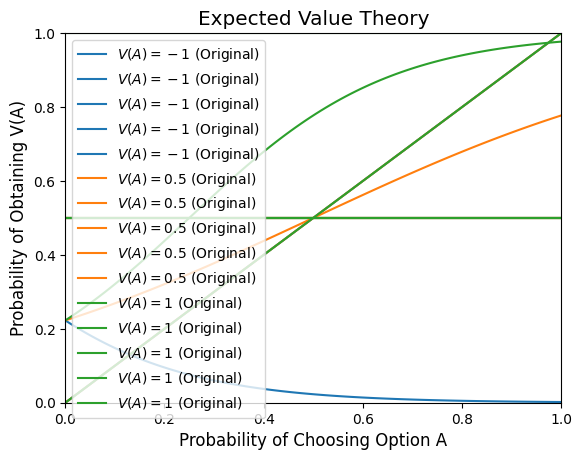

In [9]:
s.plotter()

... against a fitted model if it exists:

/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


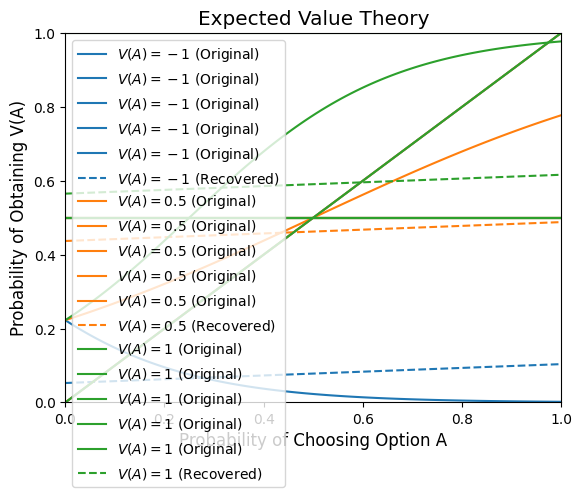

In [10]:
from sklearn.linear_model import LinearRegression
ivs = [iv.name for iv in s.variables.independent_variables]
dvs = [dv.name for dv in s.variables.dependent_variables]
X = experiment_data[ivs]
y = experiment_data[dvs]
model = LinearRegression().fit(X, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

In [11]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [12]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=2)
print(state.conditions)

           V_A       P_A       V_B  P_B
239  -1.000000  0.222222 -0.333333  1.0
7580  0.555556  0.555556  0.777778  0.0


Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [13]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

,V_A,P_A,V_B,P_B,choose_A
239,-1.000000,0.222222,-0.333333,1.0,0.625000
7580,0.555556,0.555556,0.777778,0.0,0.780558


Wrap the regressor with the `estimator_on_state` wrapper:

In [14]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"rt = "
      f"{model.coef_[0][0]:.2f}*V_A "
      f"{model.coef_[0][1]:.2f}*P_A "
      f"{model.coef_[0][2]:.2f}*V_B "
      f"{model.coef_[0][3]:.2f}*P_B "
      f"{model.intercept_[0]:+.2f} ")

rt = 0.05*V_A 0.01*P_A 0.04*V_B -0.03*P_B +0.72 
